Dataset source: https://www.kaggle.com/datasets/uciml/mushroom-classification

In [113]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv("../../datasets/mushrooms.csv")

In [114]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [115]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [116]:
df.isna().any()

# no empty values

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [117]:
bool(df.duplicated().any())

# No duplicated data

False

In [118]:
df.shape

(8124, 23)

In [119]:
# prepare data for converting characters into a number (by index)
data_encode = {}

for column in df.columns:
    data_encode[column] = df[column].unique().tolist()

def make_data_encoder(column_name):
    def data_encoder(value):
        return data_encode[column_name].index(value)
    return data_encoder

In [120]:
data_encode

{'class': ['p', 'e'],
 'cap-shape': ['x', 'b', 's', 'f', 'k', 'c'],
 'cap-surface': ['s', 'y', 'f', 'g'],
 'cap-color': ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'],
 'bruises': ['t', 'f'],
 'odor': ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'],
 'gill-attachment': ['f', 'a'],
 'gill-spacing': ['c', 'w'],
 'gill-size': ['n', 'b'],
 'gill-color': ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
 'stalk-shape': ['e', 't'],
 'stalk-root': ['e', 'c', 'b', 'r', '?'],
 'stalk-surface-above-ring': ['s', 'f', 'k', 'y'],
 'stalk-surface-below-ring': ['s', 'f', 'y', 'k'],
 'stalk-color-above-ring': ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'],
 'stalk-color-below-ring': ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'],
 'veil-type': ['p'],
 'veil-color': ['w', 'n', 'o', 'y'],
 'ring-number': ['o', 't', 'n'],
 'ring-type': ['p', 'e', 'l', 'f', 'n'],
 'spore-print-color': ['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'],
 'population': ['s', 'n', 'a', 'v', 'y', 'c'],
 'habitat': ['u'

In [121]:
df["stalk-root"].unique().tolist()

['e', 'c', 'b', 'r', '?']

In [122]:
df["veil-type"].unique().tolist()

['p']

In [123]:
df = df.drop(columns=["veil-type"])

In [124]:
df = df[df["stalk-root"] != "?"]

In [125]:
bool(df.duplicated().any())

False

In [126]:
# reset the whole thing
data_encode = {}

for column in df.columns:
    data_encode[column] = df[column].unique().tolist()

In [127]:
data_encode

{'class': ['p', 'e'],
 'cap-shape': ['x', 'b', 's', 'f', 'k', 'c'],
 'cap-surface': ['s', 'y', 'f', 'g'],
 'cap-color': ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'c'],
 'bruises': ['t', 'f'],
 'odor': ['p', 'a', 'l', 'n', 'f', 'c', 'm'],
 'gill-attachment': ['f', 'a'],
 'gill-spacing': ['c', 'w'],
 'gill-size': ['n', 'b'],
 'gill-color': ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'r', 'y'],
 'stalk-shape': ['e', 't'],
 'stalk-root': ['e', 'c', 'b', 'r'],
 'stalk-surface-above-ring': ['s', 'f', 'k', 'y'],
 'stalk-surface-below-ring': ['s', 'f', 'y', 'k'],
 'stalk-color-above-ring': ['w', 'g', 'p', 'n', 'b', 'c', 'y'],
 'stalk-color-below-ring': ['w', 'p', 'g', 'b', 'n', 'c', 'y'],
 'veil-color': ['w', 'y'],
 'ring-number': ['o', 't', 'n'],
 'ring-type': ['p', 'e', 'l', 'n'],
 'spore-print-color': ['k', 'n', 'u', 'h', 'r', 'w'],
 'population': ['s', 'n', 'a', 'v', 'y', 'c'],
 'habitat': ['u', 'g', 'm', 'd', 'p', 'l']}

In [128]:
# convert characters into a number
for column in df.columns:
    data_encoder = make_data_encoder(column)
    df[column] = df[column].map(data_encoder)

# tried pd.factorize() but with this way, the model is smarter for some reason...

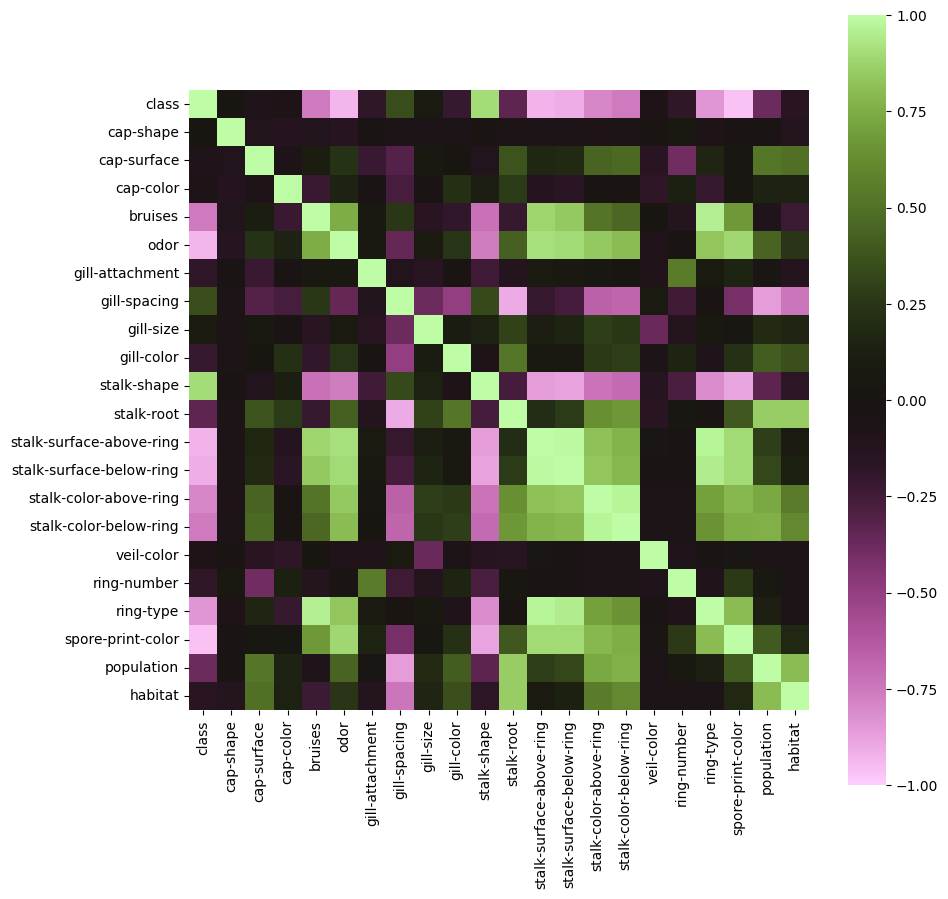

In [ ]:
from dython.nominal import associations

corr = df.corr(method="spearman")

corr_heatmap = associations(corr, figsize=(10, 10), annot=False, cmap="vanimo")["corr"]

In [130]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,1,1,1,0,1,3,0,0,1,4,...,3,2,3,4,0,1,0,5,4,4
8001,1,0,1,0,1,3,0,0,1,4,...,3,2,3,4,0,1,0,5,4,4
8038,1,0,1,3,0,3,0,0,1,4,...,0,0,0,0,0,1,0,5,4,4
8095,0,0,1,7,1,6,0,0,1,8,...,2,2,5,5,0,2,3,5,5,3


In [131]:
df.shape

(5644, 22)

In [132]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

y = df["class"]
x = df.drop(columns=["class"])
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [133]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.142857,0.0,0.166667,0.0,0.0,1.0,0.000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.2,0.2,0.2
2,0.2,0.000000,0.285714,0.0,0.333333,0.0,0.0,1.0,0.125,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.2,0.2,0.4
3,0.0,0.333333,0.285714,0.0,0.000000,0.0,0.0,0.0,0.125,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.428571,1.0,0.500000,0.0,1.0,1.0,0.000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.2,0.4,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,0.2,0.333333,0.000000,1.0,0.500000,0.0,0.0,1.0,0.500,0.0,...,1.000000,0.666667,0.500000,0.666667,0.0,0.5,0.000000,1.0,0.8,0.8
5640,0.0,0.333333,0.000000,1.0,0.500000,0.0,0.0,1.0,0.500,0.0,...,1.000000,0.666667,0.500000,0.666667,0.0,0.5,0.000000,1.0,0.8,0.8
5641,0.0,0.333333,0.428571,0.0,0.500000,0.0,0.0,1.0,0.500,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.5,0.000000,1.0,0.8,0.8
5642,0.0,0.333333,1.000000,1.0,1.000000,0.0,0.0,1.0,1.000,0.0,...,0.666667,0.666667,0.833333,0.833333,0.0,1.0,1.000000,1.0,1.0,0.6


In [134]:
y

0       0
1       1
2       1
3       0
4       1
       ..
7986    1
8001    1
8038    1
8095    0
8114    0
Name: class, Length: 5644, dtype: int64

In [135]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [136]:
from sklearn.tree import DecisionTreeClassifier

d3_clf = DecisionTreeClassifier()
d3_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [137]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(x_train, y_train)

SVC()

In [138]:
# evalute models

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

d3_pred = d3_clf.predict(x_test)
svm_pred = svm_clf.predict(x_test)

d3_accuracy = accuracy_score(y_test, d3_pred)
d3_precision = precision_score(y_test, d3_pred)
d3_recall = recall_score(y_test, d3_pred)
d3_f1 = f1_score(y_test, d3_pred)
d3_confusion_matrix = confusion_matrix(y_test, d3_pred)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_confusion_matrix = confusion_matrix(y_test, svm_pred)

In [139]:
d3_accuracy, d3_precision, d3_recall, d3_f1

(1.0, 1.0, 1.0, 1.0)

In [140]:
svm_accuracy, svm_precision, svm_recall, svm_f1

(1.0, 1.0, 1.0, 1.0)

In [141]:
d3_confusion_matrix

array([[539,   0],
       [  0, 872]])

In [142]:
svm_confusion_matrix

array([[539,   0],
       [  0, 872]])

In [143]:
from sklearn.ensemble import VotingClassifier

estimators = [("decision_tree", d3_clf),
              ("svm", svm_clf)]

ensemble_clf = VotingClassifier(estimators)
ensemble_clf.fit_transform(x_train, y_train)

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [1, 1],
       [0, 0],
       [1, 1]], shape=(4233, 2))

In [144]:
ensemble_pred = ensemble_clf.predict(x_test)

ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)
ensemble_confusion_matrix = confusion_matrix(y_test, ensemble_pred)

In [145]:
ensemble_accuracy, ensemble_precision, ensemble_recall, ensemble_f1

(1.0, 1.0, 1.0, 1.0)

In [146]:
ensemble_confusion_matrix

array([[539,   0],
       [  0, 872]])

In [147]:
import joblib

joblib.dump(ensemble_clf, "../../models/mushroom_predictor.joblib")

['../../models/mushroom_predictor.joblib']